In [29]:
import pandas as pd
file_path = 'DataSetAero.csv'
df = pd.read_csv(file_path)
df_cleaned = df.drop(columns=['Unnamed: 0', 'id'])
df_cleaned.columns = [col.strip().replace(' ', '_').lower() for col in df_cleaned.columns]
df_cleaned = df_cleaned.drop_duplicates()
null_columns = df_cleaned.columns[df_cleaned.isnull().any()]
null_columns_with_counts = df_cleaned[null_columns].isnull().sum()
for column in null_columns:
    if df_cleaned[column].dtype == 'object':
        df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)
    else:
        df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df_cleaned[column] = df_cleaned[column].astype('category')
df_cleaned.head(), null_columns_with_counts

C:\Users\angel\AppData\Local\Temp\ipykernel_25908\837007067.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)


(   gender      customer_type  age   type_of_travel     class  flight_distance  \
 0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
 1    Male  disloyal Customer   25  Business travel  Business              235   
 2  Female     Loyal Customer   26  Business travel  Business             1142   
 3  Female     Loyal Customer   25  Business travel  Business              562   
 4    Male     Loyal Customer   61  Business travel  Business              214   
 
    inflight_wifi_service  departure/arrival_time_convenient  \
 0                      3                                  4   
 1                      3                                  2   
 2                      2                                  2   
 3                      2                                  5   
 4                      3                                  3   
 
    ease_of_online_booking  gate_location  ...  inflight_entertainment  \
 0                       3              1  ...

In [30]:
print(df.describe())

          Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000

In [31]:

categorical_columns = df_cleaned.select_dtypes(include=['category']).columns


for column in categorical_columns:
    print(f"Column: {column}")
    print(f"Categories: {df_cleaned[column].cat.categories}\n")


df_cleaned.head()

Column: gender
Categories: Index(['Female', 'Male'], dtype='object')

Column: customer_type
Categories: Index(['Loyal Customer', 'disloyal Customer'], dtype='object')

Column: type_of_travel
Categories: Index(['Business travel', 'Personal Travel'], dtype='object')

Column: class
Categories: Index(['Business', 'Eco', 'Eco Plus'], dtype='object')

Column: satisfaction
Categories: Index(['neutral or dissatisfied', 'satisfied'], dtype='object')



,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [35]:
columns_to_drop = ['customer_type', 'type_of_travel', 'class']  


print("Nombres de las columnas antes de eliminar:")
print(df_cleaned.columns)


df_cleaned = df_cleaned.drop(columns=columns_to_drop)


df_cleaned.head()

Nombres de las columnas antes de eliminar:
Index(['gender', 'customer_type', 'age', 'type_of_travel', 'class',
       'flight_distance', 'inflight_wifi_service',
       'departure/arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on-board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes'],
      dtype='object')


,gender,age,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
0,Male,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,Male,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,Female,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,Female,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,Male,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [36]:
translation_dict = {
    'gender': 'Género',
    'age': 'Edad',
    'flight_distance': 'Distancia de Vuelo',
    'inflight_wifi_service': 'Servicio de Wifi en Vuelo',
    'departure/arrival_time_convenient': 'Hora de Salida/Llegada Conveniente',
    'ease_of_online_booking': 'Facilidad de Reserva en Línea',
    'gate_location': 'Ubicación de la Puerta',
    'food_and_drink': 'Comida y Bebida',
    'online_boarding': 'Embarque en Línea',
    'seat_comfort': 'Comodidad del Asiento',
    'inflight_entertainment': 'Entretenimiento en Vuelo',
    'on-board_service': 'Servicio a Bordo',
    'leg_room_service': 'Servicio de Espacio para las Piernas',
    'baggage_handling': 'Manejo de Equipaje',
    'checkin_service': 'Servicio de Registro',
    'inflight_service': 'Servicio en Vuelo',
    'Cleanliness': 'Limpieza',
    'departure_delay_in_minutes': 'Retraso en la Salida en Minutos',
    'arrival_delay_in_minutes': 'Retraso en la Llegada en Minutos',

}


df_translated = df_cleaned.rename(columns=translation_dict)


df_translated.head()


,Género,Edad,Distancia de Vuelo,Servicio de Wifi en Vuelo,Hora de Salida/Llegada Conveniente,Facilidad de Reserva en Línea,Ubicación de la Puerta,Comida y Bebida,Embarque en Línea,Comodidad del Asiento,Entretenimiento en Vuelo,Servicio a Bordo,Servicio de Espacio para las Piernas,Manejo de Equipaje,Servicio de Registro,Servicio en Vuelo,cleanliness,Retraso en la Salida en Minutos,Retraso en la Llegada en Minutos
0,Male,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,Male,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,Female,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,Female,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,Male,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [38]:
print(df_translated)

       Género  Edad  Distancia de Vuelo  Servicio de Wifi en Vuelo  \
0           0    13                 460                          3   
1           0    25                 235                          3   
2           1    26                1142                          2   
3           1    25                 562                          2   
4           0    61                 214                          3   
...       ...   ...                 ...                        ...   
103899      1    23                 192                          2   
103900      0    49                2347                          4   
103901      0    30                1995                          1   
103902      1    22                1000                          1   
103903      0    27                1723                          1   

        Hora de Salida/Llegada Conveniente  Facilidad de Reserva en Línea  \
0                                        4                              3   
1    

Aqui se comienza Regresion Logistica


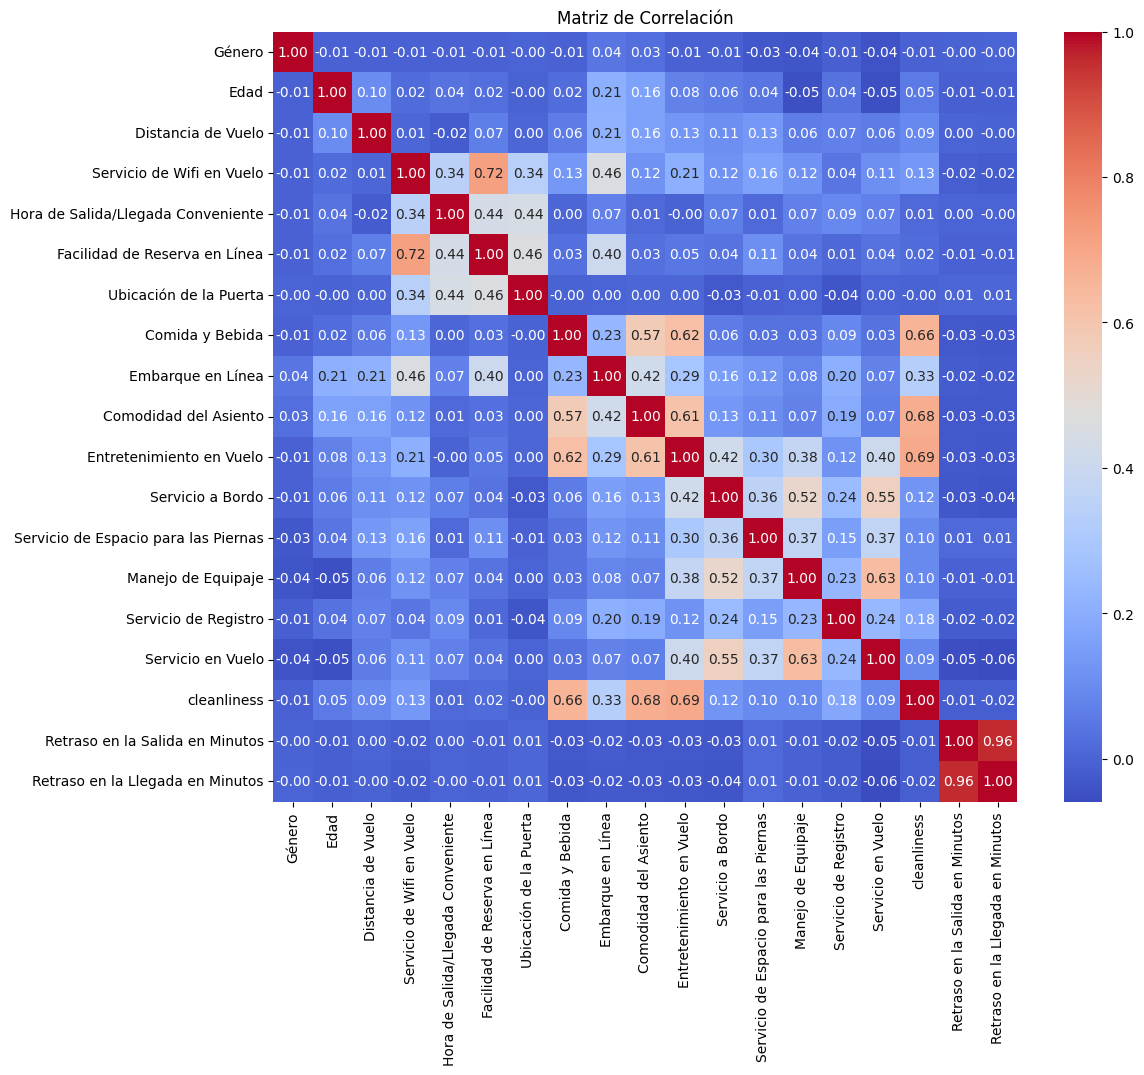

In [37]:
df_translated['Género'] = df_translated['Género'].map({'Male': 0, 'Female': 1})
correlation_matrix = df_translated.corr()
correlation_matrix.to_csv('DataSetAero.csv')
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [93]:
df_translated.head()

,Género,Embarque en Línea,Servicio a Bordo,Servicio de Espacio para las Piernas,Manejo de Equipaje,Servicio de Registro,Servicio en Vuelo,cleanliness,Retraso en la Salida en Minutos,Retraso en la Llegada en Minutos
0,NaN,3,4,3,4,4,5,5,25,18.0
1,NaN,3,1,5,3,1,4,1,1,6.0
2,NaN,5,4,3,4,4,4,5,0,0.0
3,NaN,2,2,5,3,1,4,2,11,9.0
4,NaN,5,3,4,4,3,3,3,0,0.0


In [92]:
threshold = 0.4
columns_to_drop = []
for col in correlation_matrix.columns:
    for idx in correlation_matrix.index:
        if abs(correlation_matrix.loc[idx, col]) < threshold and idx != col:
            columns_to_drop.append(idx)
            break
df_translated.drop(columns=columns_to_drop, inplace=True)

df_translated.to_csv('DataSetAero.csv', index=False)


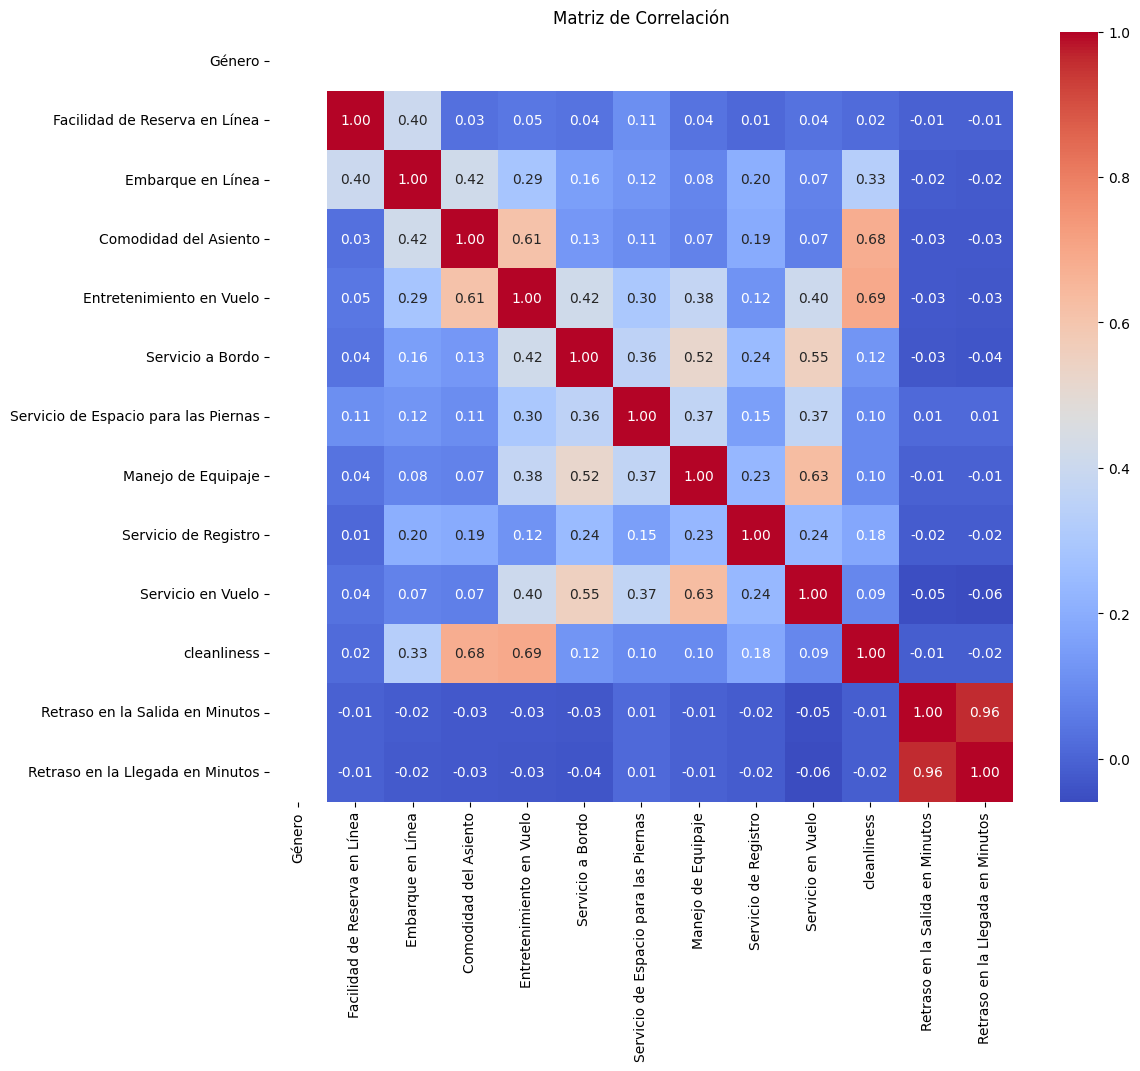

In [90]:


correlation_matrix = df_translated.corr()
correlation_matrix.to_csv('DataSetAero.csv')
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

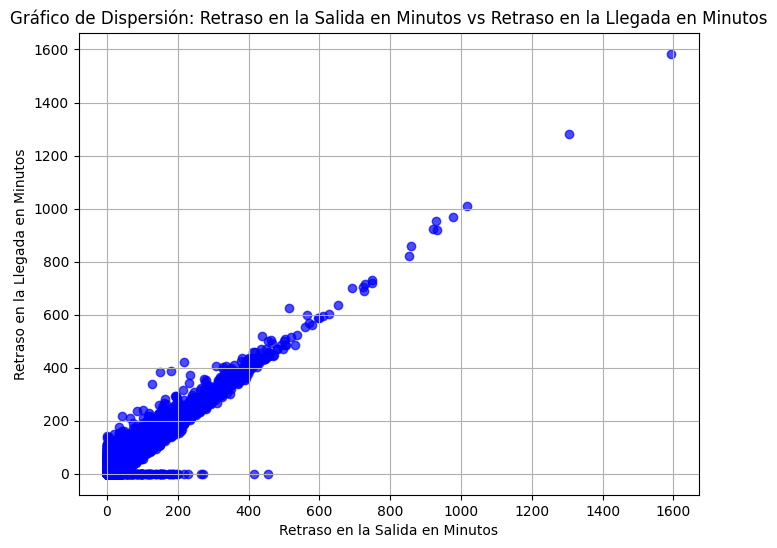

In [94]:
df_translated.head()

plt.figure(figsize=(8, 6))
plt.scatter(df_translated['Retraso en la Salida en Minutos'], df_translated['Retraso en la Llegada en Minutos'], marker='o', c='blue', alpha=0.7)
plt.title('Gráfico de Dispersión: Retraso en la Salida en Minutos vs Retraso en la Llegada en Minutos')
plt.xlabel('Retraso en la Salida en Minutos')
plt.ylabel('Retraso en la Llegada en Minutos')
plt.grid(True)
plt.show()

In [99]:
matriz = df_translated.corr().abs()

matrizB = matriz.unstack().sort_values(ascending=False).drop_duplicates()
for (var1, var2), correlacion in matrizB.items():
    print(f"Entre la variables '{var1}' y {var2} tiene un corelaccion de '{round((correlacion * 100), 2 )}%'")

Entre la variables 'Embarque en Línea' y Embarque en Línea tiene un corelaccion de '100.0%'
Entre la variables 'Retraso en la Llegada en Minutos' y Retraso en la Salida en Minutos tiene un corelaccion de '96.02%'
Entre la variables 'Manejo de Equipaje' y Servicio en Vuelo tiene un corelaccion de '62.86%'
Entre la variables 'Servicio a Bordo' y Servicio en Vuelo tiene un corelaccion de '55.08%'
Entre la variables 'Servicio a Bordo' y Manejo de Equipaje tiene un corelaccion de '51.91%'
Entre la variables 'Servicio de Espacio para las Piernas' y Manejo de Equipaje tiene un corelaccion de '36.95%'
Entre la variables 'Servicio de Espacio para las Piernas' y Servicio en Vuelo tiene un corelaccion de '36.87%'
Entre la variables 'Servicio a Bordo' y Servicio de Espacio para las Piernas tiene un corelaccion de '35.55%'
Entre la variables 'Embarque en Línea' y cleanliness tiene un corelaccion de '33.15%'
Entre la variables 'Servicio de Registro' y Servicio a Bordo tiene un corelaccion de '24.39%

Aqui Comienza Regresión Logistica


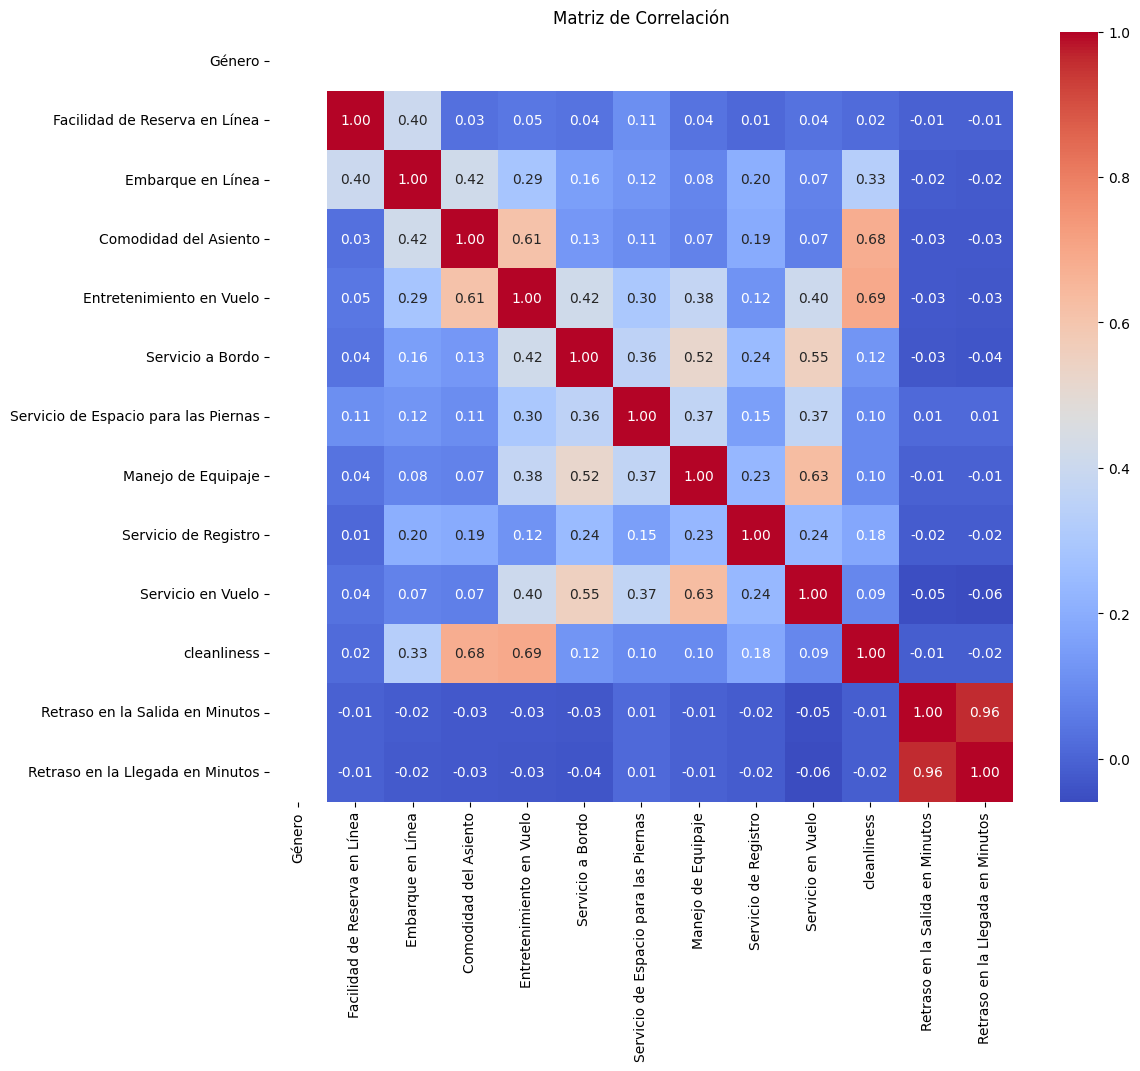

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [106]:
df_translated.head()

df_translated['promedio']=(df_translated['Retraso en la Salida en Minutos'] + df_translated['Retraso en la Llegada en Minutos'])/2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [109]:
import numpy as np
df_translated['riesgo'] = np.where(df_translated['promedio'] <= 3,0, np.where(df_translated['promedio'] <=4,1,2))

df_translated.head()


,Género,Embarque en Línea,Servicio a Bordo,Servicio de Espacio para las Piernas,Manejo de Equipaje,Servicio de Registro,Servicio en Vuelo,cleanliness,Retraso en la Salida en Minutos,Retraso en la Llegada en Minutos,promedio,riesgo
0,NaN,3,4,3,4,4,5,5,25,18.0,21.5,2
1,NaN,3,1,5,3,1,4,1,1,6.0,3.5,1
2,NaN,5,4,3,4,4,4,5,0,0.0,0.0,0
3,NaN,2,2,5,3,1,4,2,11,9.0,10.0,2
4,NaN,5,3,4,4,3,3,3,0,0.0,0.0,0


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
variables = ['Embarque en Línea','Servicio a Bordo', 'Servicio de Espacio para las Piernas', 'Manejo de Equipaje','Servicio de Registro', 'Servicio en Vuelo','cleanliness']
X = df_translated[variables]
y = df_translated['riesgo']
X_train, X_tests, y_train, y_tests = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_tests_scaled = scaler.transform(X_tests)
model = LogisticRegression(max_iter=1000)
y_pred = model.predict(X_tests_scaled)
prediccion = accuracy_score(y_tests, y_pred)
print('la predicion del modelo es: ', prediccion)
matriz_confunsion = confusion_matrix(y_tests, y_pred)
print("Matriz de confusion")
print(matriz_confunsion)

la predicion del modelo es:  0.5958808527019874
Matriz de confusion
[[12383     0     0]
 [  594     0     0]
 [ 7804     0     0]]


In [116]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [120]:
print('la predicion del modelo es: ', prediccion)


la predicion del modelo es:  0.5958808527019874


In [121]:
print("Matriz de confusion")
print(matriz_confunsion)


Matriz de confusion
[[12383     0     0]
 [  594     0     0]
 [ 7804     0     0]]
